NFLX    0.001527
dtype: float64

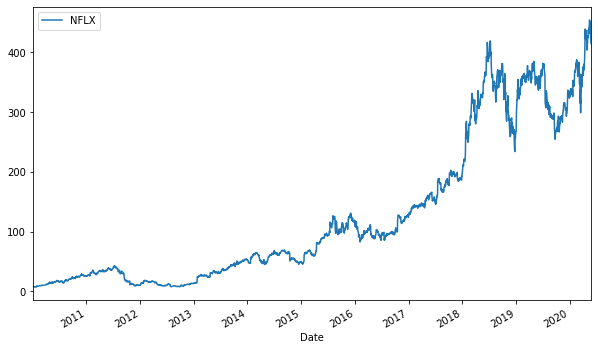

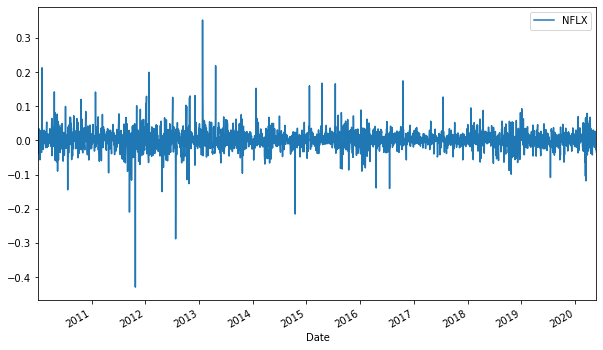

In [12]:
#Run a Monte Carlo simulation in Python to approximate the daily stock price of Netflix (ticker="NFLX")


#import relevant libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

#forecast netflix's future stock price
ticker= "NFLX"
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2010-1-1')['Adj Close']#estimating

log_returns=np.log(1+data.pct_change()) #obtain simple logarithmic returns
log_returns.tail()


#plot of stock price
data.plot(figsize=(10,6));

#plot of log returns. Graph indicates a normal distribution of returns with stable mean
log_returns.plot(figsize=(10,6));



In [16]:
#calculate mean and variance of returns
u=log_returns.mean()
u


NFLX    0.001527
dtype: float64

In [17]:
var=log_returns.var()
var


NFLX    0.001066
dtype: float64

In [19]:
#calculate drift and stdev to be used in Brownian motion formula to approximate future returns
drift=u-(0.5*var)
drift


NFLX    0.000994
dtype: float64

In [20]:
stdev=log_returns.std()
stdev


NFLX    0.032657
dtype: float64

In [21]:
#check types for drift and stdev
type(drift)



pandas.core.series.Series

In [22]:
type(stdev)

pandas.core.series.Series

In [23]:
#convert the values for drift and stdev into numpy arrays. Obtain same result by adding '.values'
np.array(drift)

array([0.00099423])

In [24]:
stdev.values

array([0.0326569])

In [25]:
norm.ppf(0.95)#create a variable that corresponds to difference between mean and events (standard deviation)
#event has 95% chance of occuring, distance = 1.65 standard deviations

1.6448536269514722

In [26]:
#create a random variable 'x'
x=np.random.rand(10,2) #2 arguments for a multi-dimensional array (10x2 matrix)
x


array([[0.35161882, 0.91949004],
       [0.84016601, 0.13142453],
       [0.0498119 , 0.39386064],
       [0.14840983, 0.97941693],
       [0.60008059, 0.52311128],
       [0.07690969, 0.87700625],
       [0.08616876, 0.96934092],
       [0.53399852, 0.26182853],
       [0.85237859, 0.17367071],
       [0.37513511, 0.63816797]])

In [27]:
#include 'x' in ppf matrix to obtain distance from mean corresponding to each of these randomly generated probabilities.
norm.ppf(x)


array([[-0.38095366,  1.40164954],
       [ 0.99514042, -1.11968257],
       [-1.64668019, -0.26927083],
       [-1.04327777,  2.04185269],
       [ 0.2535557 ,  0.05796382],
       [-1.42616962,  1.16015057],
       [-1.36473127,  1.87119422],
       [ 0.08532508, -0.63771832],
       [ 1.04668948, -0.93975857],
       [-0.31828308,  0.35356613]])

In [28]:
z=norm.ppf(np.random.rand(10,2))
z
#used the randomly generated probabilities from x to calculate distances from mean zero

array([[-0.60637283, -1.1183643 ],
       [-0.31830569,  1.04717309],
       [ 0.59740219,  0.55666528],
       [-1.11272622,  0.61345296],
       [ 1.37710464,  0.08621409],
       [ 0.76132437, -1.1222043 ],
       [-1.31407217,  0.61215946],
       [-0.32316076,  0.12208681],
       [ 0.56760464,  1.79971252],
       [-1.19284955, -0.14937533]])

In [29]:
#specify time intervals
t_intervals=1000 #forecasting stock price for upcoming 1000 days
iterations=10 #produce 10 series of future stock price predictions

#dailyreturns=e^r
#r=drift + stdev*z


dailyreturns=np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
dailyreturns

#This generates a 100x10 array of random future stock prices.

array([[1.01342645, 0.98440221, 0.96317172, ..., 1.02980753, 1.00513865,
        1.02570117],
       [0.96791638, 0.99507403, 0.98321004, ..., 0.98715432, 0.98585417,
        1.05512991],
       [0.95471193, 0.99372327, 1.00627595, ..., 0.94543784, 0.9970663 ,
        0.99358457],
       ...,
       [1.01226603, 0.98724695, 1.03466857, ..., 1.00201088, 0.95419437,
        1.00708115],
       [1.04491128, 1.02269454, 1.00225856, ..., 1.00766542, 0.92210564,
        0.97863291],
       [0.98012723, 0.96594389, 0.99923236, ..., 1.01482579, 0.98543108,
        1.00028049]])

In [30]:
#create price list: price(t) = price(0)*simulated daily return(t)
#Then, price(t+1)=price(t)*simulated daily return (t+1)


#Use first stock price equal to last price in our dataset, reflects current market price. Let this be S0
S0=data.iloc[-1] #last value in the table.
S0



NFLX    414.769989
Name: 2020-05-26 00:00:00, dtype: float64

In [31]:
price_list=np.zeros_like(dailyreturns) #create array with same dimensions as dailyreturns array, and fill with zeros.
price_list


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
#Replace zeros with expected stock prices using a loop
price_list[0]=S0 #set first row of prices equal to current market price
price_list 


array([[414.76998901, 414.76998901, 414.76998901, ..., 414.76998901,
        414.76998901, 414.76998901],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [33]:
#Set up a loop starting at day1 & ending at day1000
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*dailyreturns[t]
    
price_list


array([[ 414.76998901,  414.76998901,  414.76998901, ...,  414.76998901,
         414.76998901,  414.76998901],
       [ 401.46266706,  412.72684325,  407.80601746, ...,  409.44198574,
         408.90272217,  437.6362223 ],
       [ 383.28119651,  410.13626706,  410.36538934, ...,  387.10194598,
         407.70312352,  434.82859817],
       ...,
       [ 455.74601098,  731.67843489,  942.14278338, ...,  918.75178368,
         445.97569853, 1976.76763597],
       [ 476.21414619,  748.28354008,  944.27066674, ...,  925.7944014 ,
         411.23670564, 1934.52985729],
       [ 466.75045118,  722.79991023,  943.54580784, ...,  939.52003109,
         405.2454327 , 1935.0724767 ]])

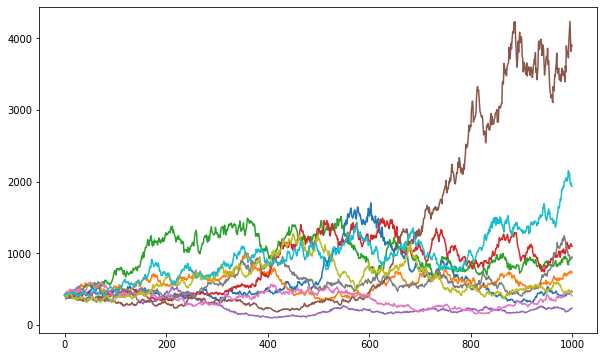

In [35]:
plt.figure(figsize=(10,6))
plt.plot(price_list);
#This generates a graph of 10 possible stock price paths of expected stock price of Netflix.



